<h1 align='center'>Image and Video Processing</h1>
<h1 align='center'>Assignment 3</h1>
<h2 align='center'>Pushkal Mishra</h2>
<h2 align='center'>EE20BTECH11042</h2>

# Table of Contents
- [Importing Libraries](#1)
- [Importing Images](#2)
- [Question 1 - Periodic Convolution](#3)
    - [Circular Convolution](#4)
    - [Linear Convolution](#5)
    - [Linear Convolution using DFT](#6)
- [Question 2 - Image Denoising using Linear Filters](#7)
    - [Using Average Filter of Size M x M](#8)
    - [Using Gaussian Filter of Size 5 x 5](#9)
- [Question 3 - Image Quality Assessment](#10)
    - [MSE and PSNR calculation](#11)
    - [SSIM Index calculation](#12)
    - [Generating Distortions](#13)
        - [Mean Shift](#14)
        - [Adding AWGN](#15)
        - [JPEG Compression](#16)
        - [Gaussian Blur](#17)
    - [Tesing on Images](#18)
    - [Correlations of Scores](#19)

<a name = '1'></a>
# Importing Libraries

In [1]:
import numpy as np
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt

<a name = '2'></a>
# Importing Images

In [2]:
aerial = img.imread('5.1.10.tiff')
splash = np.array(Image.open('4.2.01.tiff').convert("L"), dtype = int)
peppers = np.array(Image.open('4.2.07.tiff').convert("L"), dtype = int)
mandril = np.array(Image.open('4.2.03.tiff').convert("L"), dtype = int)
jelly_beans = np.array(Image.open('4.1.07.tiff').convert("L"), dtype = int)

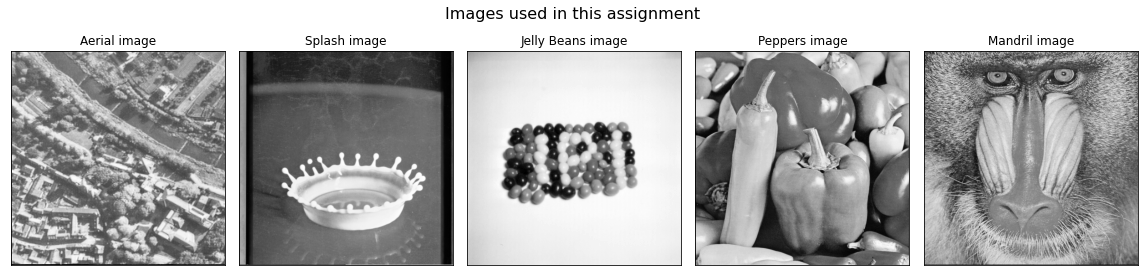

In [3]:
fig = plt.figure(figsize = (16, 4))
fig.suptitle("Images used in this assignment", size = 16)

plt.subplot(1, 5, 1)
plt.imshow(aerial, cmap = 'gray')
plt.title("Aerial image")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 5, 2)
plt.imshow(splash, cmap = 'gray')
plt.title("Splash image")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 5, 3)
plt.imshow(jelly_beans, cmap = 'gray')
plt.title("Jelly Beans image")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 5, 4)
plt.imshow(peppers, cmap = 'gray')
plt.title("Peppers image")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 5, 5)
plt.imshow(mandril, cmap = 'gray')
plt.title("Mandril image")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

<a name = '3'></a>
# Question 1 - Periodic Convolution

## Circular Convolution <a name = '4'></a>

In [4]:
def circularConvolution(image1, image2):
    N1, M1 = image1.shape
    N2, M2 = image2.shape
    new_image = np.zeros([N1, M1])
    for i in range(N1):
        for j in range(M1):
            val = 0
            for p in range(N2):
                for q in range(M2):
                    val += image1[(i - p) % N1, (j - q) % M1] * image2[p, q]
            new_image[i, j] = val
    
    return new_image

In [5]:
average_filter = np.ones([5, 5]) / 25
conv_image_1 = circularConvolution(aerial, average_filter)

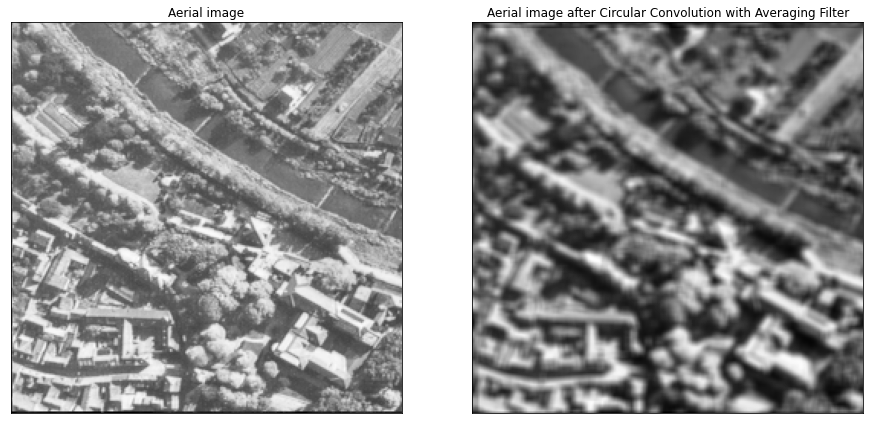

In [6]:
fig = plt.figure(figsize = (13, 6))

plt.subplot(1, 2, 1)
plt.imshow(aerial, cmap = 'gray')
plt.title("Aerial image")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(conv_image_1, cmap = 'gray')
plt.title("Aerial image after Circular Convolution with Averaging Filter")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

## Linear Convolution <a name = '5'></a>

In [7]:
def returnPaddedImage(target_shape, image):
    A, B = image.shape
    N, M = target_shape
    
    padded_image = np.zeros([N, M])
    padded_image[ : A, : B] = image

    return padded_image

def linearConvolve(image1, image2):
    N1, M1 = image1.shape
    N2, M2 = image2.shape
    
    padded_image1 = returnPaddedImage([N1 + N2 - 1, M1 + M2 - 1], image1)
    padded_image2 = returnPaddedImage([2 * N2, 2 * M2], image2)
    
    image = circularConvolution(padded_image1, padded_image2)
    
    return image

In [8]:
conv_image_2 = linearConvolve(aerial, average_filter)

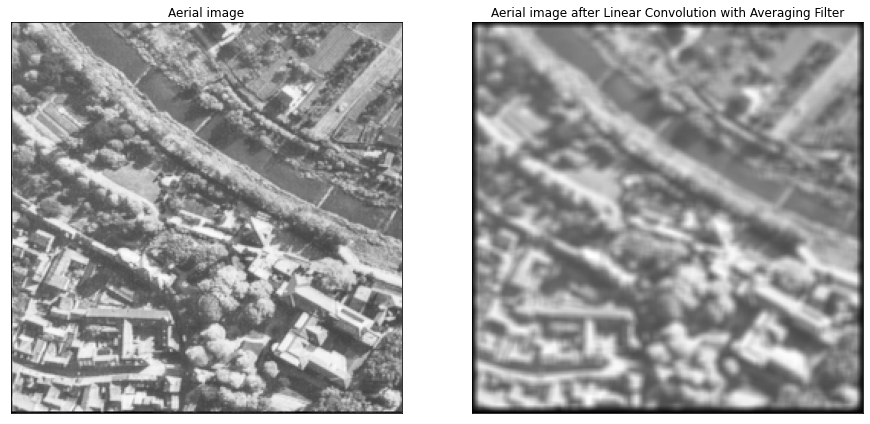

In [9]:
fig = plt.figure(figsize = (13, 6))

plt.subplot(1, 2, 1)
plt.imshow(aerial, cmap = 'gray')
plt.title("Aerial image")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(conv_image_2, cmap = 'gray')
plt.title("Aerial image after Linear Convolution with Averaging Filter")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

## Linear Convolution using DFT <a name = '6'></a>

In [10]:
def matrixDFT(image):
    M, N = image.shape
    W_N = np.zeros([N, N], dtype = complex)
    
    for i in range(N):
        for j in range(N):
            W_N[i, j] = np.exp(-2j * np.pi * i * j / N)
    
    dft_image = W_N @ image @ W_N
    
    return dft_image

def matrixIDFT(dft_image):
    M, N = dft_image.shape
    W_N = np.zeros([N, N], dtype = complex)
    
    for i in range(N):
        for j in range(N):
            W_N[i, j] = np.exp(2j * np.pi * i * j / N) / N
    
    idft_image = W_N @ dft_image @ W_N
    
    return np.real(idft_image)

def linearConvolutionDFT(image1, image2):
    N1, M1 = image1.shape
    N2, M2 = image2.shape
    
    padded_image1 = returnPaddedImage([N1 + N2 - 1, M1 + M2 - 1], image1)
    padded_image2 = returnPaddedImage([N1 + N2 - 1, M1 + M2 - 1], image2)
    
    dft_1 = matrixDFT(padded_image1)
    dft_2 = matrixDFT(padded_image2)
    prod = dft_1 * dft_2    
    result_image = matrixIDFT(prod)
    
    return result_image

In [11]:
conv_image_3 = linearConvolutionDFT(aerial, average_filter)

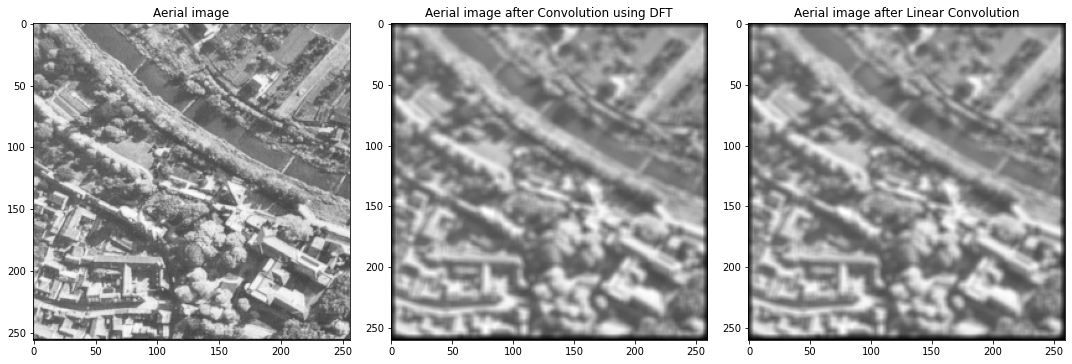

In [12]:
fig = plt.figure(figsize = (15, 8))

plt.subplot(1, 3, 1)
plt.imshow(aerial, cmap = 'gray')
plt.title("Aerial image")

plt.subplot(1, 3, 2)
plt.imshow(np.abs(conv_image_3), cmap = 'gray')
plt.title("Aerial image after Convolution using DFT")

plt.subplot(1, 3, 3)
plt.imshow(conv_image_2, cmap = 'gray')
plt.title("Aerial image after Linear Convolution")

plt.tight_layout()
plt.show()

Clearly the above two convolved images appear to look the same and have the same shape.

Hence Linear Convolution can be performed using DFT.

<a name = '7'></a>
# Question 2 - Image Denoising using Linear Filters

## Using Average Filter of Size M x M <a name = '8'></a>

In [13]:
shape = splash.shape
awgn_noise = np.random.normal(loc = 0, scale = 25, size = shape)
noisy_splash = splash + awgn_noise

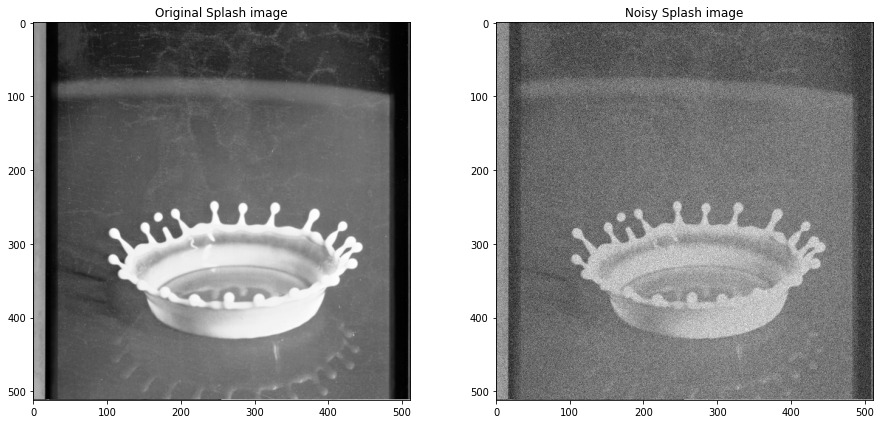

In [14]:
fig = plt.figure(figsize = (13, 6))

plt.subplot(1, 2, 1)
plt.imshow(splash, cmap = 'gray')
plt.title("Original Splash image")

plt.subplot(1, 2, 2)
plt.imshow(noisy_splash, cmap = 'gray')
plt.title("Noisy Splash image")

plt.tight_layout()
plt.show()

In [15]:
convolved_images = []
M_list = []

for M in range(3, 16, 2):
    average_filter = np.ones([M, M]) / (M * M)
    conv_image = linearConvolutionDFT(splash, average_filter)
    convolved_images.append(conv_image)
    M_list.append(M)

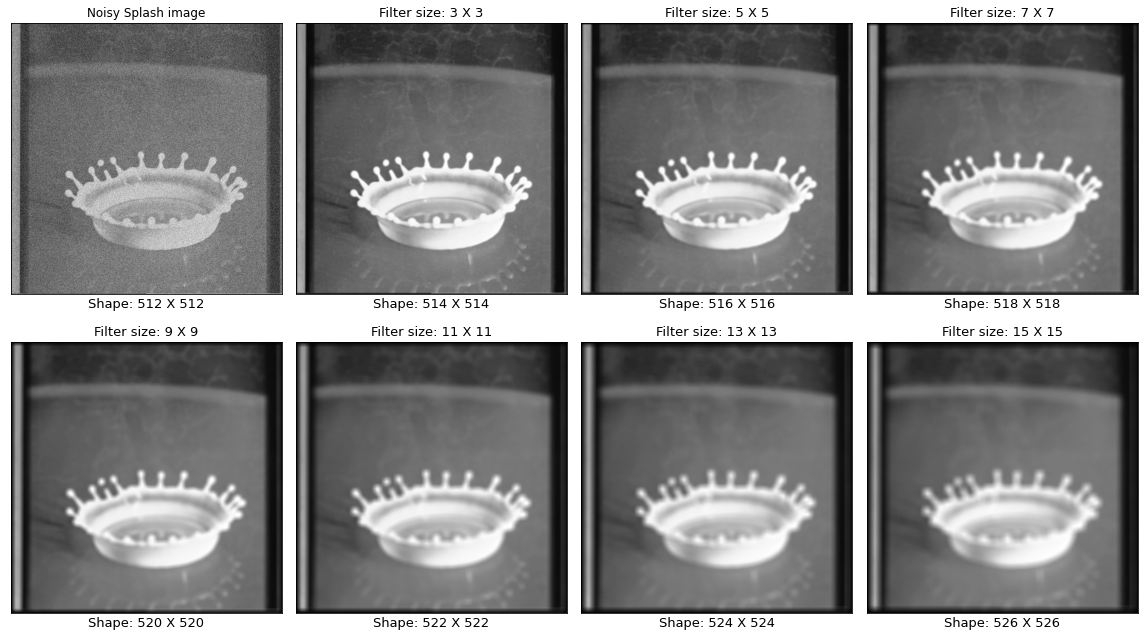

In [16]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(2, 4, 1)
plt.imshow(noisy_splash, cmap = 'gray')
plt.title("Noisy Splash image")
plt.xlabel(f"Shape: {noisy_splash.shape[0]} X {noisy_splash.shape[1]}", size = 13)
plt.xticks([])
plt.yticks([])

for i, conv_image in enumerate(convolved_images):

    plt.subplot(2, 4, i + 2)
    plt.imshow(conv_image, cmap = 'gray')
    plt.title(f"Filter size: {M_list[i]} X {M_list[i]}", size = 13)
    plt.xlabel(f"Shape: {conv_image.shape[0]} X {conv_image.shape[1]}", size = 13)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

From the above images it is apparent that as we keep increasing the filter size, resultant the images become more blur, i.e. image becomes smoother and more denoised. But after a certain filter size, the images get too smoothened to be rated as good quality eventhough they are more denoised. So there is a sweet spot between high filter size and high quality (from smoothness). This is the tradeoff.

We can judge the appropriate window size for this image from visual inspection. For the Splash image, M = 5 appears to be the best window size given the sharpness and noise in the resultant image.

## Using Gaussian Filter of Size 5 x 5 <a name = '9'></a>

In [17]:
def gaussianFilter(N, M, sigma):
    N1, M1 = int((N - 1) / 2), int((M - 1) / 2)
    gauss_filter = np.zeros([N, M])
    sigma2 = sigma ** 2

    for i in range(N):
        for j in range(M):
            gauss_filter[i, j] = np.exp(((i - N1) ** 2 + (j - M1) ** 2) / (-2.0 * sigma2))
    
    gauss_filter = gauss_filter / np.sum(gauss_filter.flatten())

    return gauss_filter

In [18]:
convolved_images = []

for sigma in range(5, 51, 5):
    gaussian_filter = gaussianFilter(5, 5, sigma / 10)
    conv_image = linearConvolutionDFT(noisy_splash, gaussian_filter)
    convolved_images.append(conv_image)

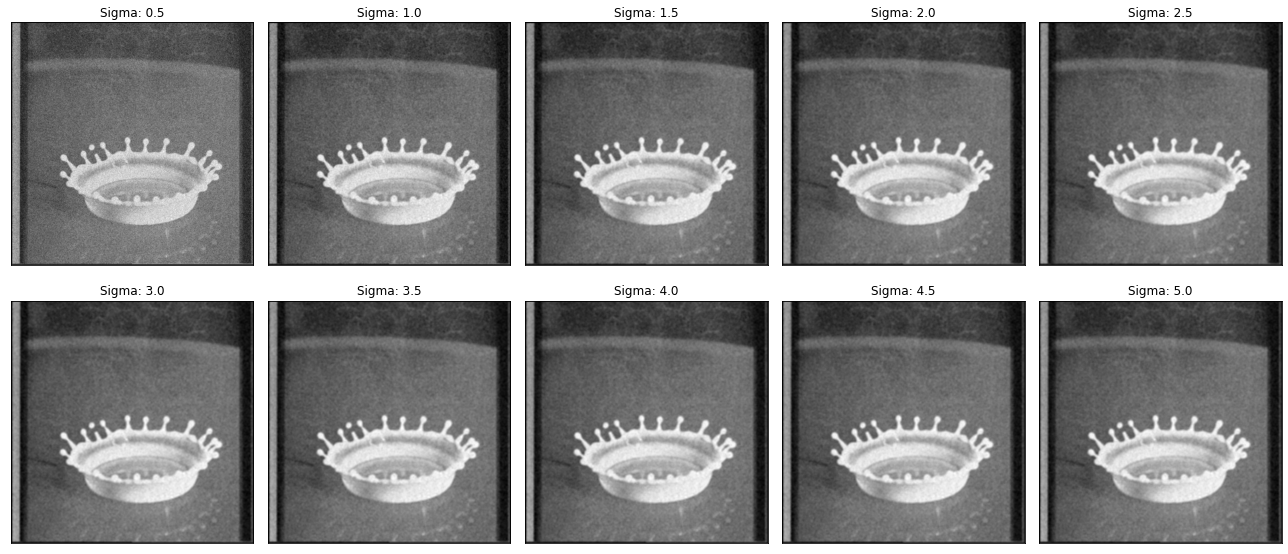

In [19]:
N, M = splash.shape

fig = plt.figure(figsize = (18, 8))

for k in range(10):    
    plt.subplot(2, 5, k + 1)
    plt.imshow(convolved_images[k], cmap = 'gray')
    plt.title(f"Sigma: {0.5 * k + 0.5}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

As the variance of the gaussian filter increases, the bandwidth of the filter reduces which causes only the low frequency components to pass through. And since noise is high frequency, the image is denoised better with higher sigma which is visually apparent in the above images.

Also this gaussian filter doesn't cause too much blurring as opposed to the averaging filter.

<a name = '10'></a>
# Question 3 - Image Quality Assessment

## MSE and PSNR calculation <a name = '11'></a>

In [20]:
def MSE_and_PSNR(image1 ,image2):
    M, N = image1.shape
    image1 = image1.astype(np.float64)
    image2 = image2.astype(np.float64)
    
    MSE = np.sum((image1 - image2) ** 2) / (M * N)
    L = 255
    PSNR = 10 * np.log10((L ** 2) / MSE)
    
    return np.around(MSE, 3), np.around(PSNR, 3)

## SSIM Index calculation <a name = '12'></a>

In [21]:
def generateGaussianWindow(size, sigma):
    P, Q = size
    window = np.zeros([P, Q])
    p1, q1 = int((P - 1) / 2), int((Q - 1) / 2)
    sigma2 = sigma ** 2
    
    for i in range(P):
        for j in range(Q):
            window[i, j] = np.exp(-((i - p1) ** 2 + (j - q1) ** 2) / (2 * sigma2))
    
    window = window / np.sum(window)
    return window

def PadForSSIM(image, filter_shape):
    P, Q = filter_shape
    M, N = image.shape
    padded_image = np.zeros([M + P - 1, N + Q - 1])
    P2, Q2 = int((P - 1) / 2), int((Q - 1) / 2)
    
    padded_image[P2 : P2 + M, Q2 :  Q2 + N] = image

    for i in range(P2):
        padded_image[i, Q2 :  Q2 + N] = image[P2 - i - 1, :]
        padded_image[i + M + P2, Q2 :  Q2 + N] = image[-1 - i , :]
    for i in range(Q2):
        padded_image[P2 : P2 + M, i] = image[:, Q2 - i - 1]
        padded_image[P2 : P2 + M, i + N + Q2] = image[:, -1 - i] 
        
    padded_image[ : P2, : Q2] = image[0, 0]
    padded_image[ : P2, Q2 + N : ] = image[0, -1]
    padded_image[P2 + M : , : Q2] = image[-1, 0]
    padded_image[P2 + M : , Q2 + N : ] = image[-1, -1]
    
    return padded_image
    
def calculateSSIMIndex(window_size, sigma, image1, image2):
    
    M, N = image1.shape
    m, n = window_size
    gaussian_window = generateGaussianWindow(window_size, sigma)
    padded_image1 = PadForSSIM(image1, window_size)
    padded_image2 = PadForSSIM(image2, window_size)
    
    mu_1 = np.zeros(image1.shape)
    mu_2 = np.zeros(image2.shape)
    
    sigma_1 = np.zeros(image1.shape)
    sigma_2 = np.zeros(image2.shape)
    
    sigma_12 = np.zeros(image1.shape)
    
    C1 = (0.01 * 255) ** 2
    C2 = (0.03 * 255) ** 2
    C3 = C2 / 2
    
    L = np.zeros(image1.shape)
    C = np.zeros(image1.shape)
    S = np.zeros(image1.shape)
    
    for i in range(M):
        for j in range(N):
            mu_1[i, j] = np.sum(gaussian_window * padded_image1[i : i + m, j : j + n])
            mu_2[i, j] = np.sum(gaussian_window * padded_image2[i : i + m, j : j + n])
    
            sigma_1[i, j] = np.sqrt(np.sum(gaussian_window * (padded_image1[i : i + m, j : j + n] - mu_1[i, j]) ** 2))
            sigma_2[i, j] = np.sqrt(np.sum(gaussian_window * (padded_image2[i : i + m, j : j + n] - mu_2[i, j]) ** 2))
    
            sigma_12[i, j] = np.sum(gaussian_window * (padded_image1[i : i + m, j : j + n] - mu_1[i, j]) * (padded_image2[i : i + m, j : j + n] - mu_2[i, j]))
    
            L[i, j] = (2 * mu_1[i, j] * mu_2[i, j] + C1) / (mu_1[i, j] ** 2 + mu_2[i, j] ** 2 + C1)
            C[i, j] = (2 * sigma_1[i, j] * sigma_2[i, j] + C2) / (sigma_1[i, j] ** 2 + sigma_2[i, j] ** 2 + C2)
            S[i, j] = (sigma_12[i, j] + C3) / (sigma_1[i, j] * sigma_2[i, j] + C3)
    
    SSIM = L * C * S
    MSSIM = np.around(np.average(SSIM), 4)

    return MSSIM, SSIM

## Generating Distortions <a name = '13'></a>

### Mean Shift <a name = '14'></a>

In [22]:
def meanShift(image, mean):
    threshold = int(2 ** np.ceil(np.log2(np.max(image.flatten())))) - 1
    new_image = image + mean
    new_image[new_image > threshold] = threshold
    return new_image

### Adding AWGN <a name = '15'></a>

In [23]:
def addAWGN(image, sigma):
    noisy_image = image + np.random.normal(loc = 0, scale = sigma, size = image.shape)
    return noisy_image

### JPEG Compression <a name = '16'></a>

In [24]:
from PIL import Image
import os

def JPEG_compression(image):
    img_numpy = np.array(image, dtype=np.uint8)
    img = Image.fromarray(img_numpy, "L")
    img.save("image.jpeg", optimize = True, quality = 10)
    img_arr = np.array(Image.open('image.jpeg'), dtype = "int")
    os.remove("image.jpeg")
    return img_arr

### Gaussian Blur <a name = '17'></a>

In [25]:
def gaussianKernel(filter_shape, sigma):
    m, n = filter_shape
    gauss_filter = np.zeros(filter_shape)
    
    for i in range(m):
        for j in range(n):
            gauss_filter[i, j] = np.exp((i ** 2 + j ** 2) / (2 * sigma ** 2))
    gauss_filter = gauss_filter / np.sum(gauss_filter)
    
    return gauss_filter

def gaussianBlur(image, filter_shape, sigma):
    M, N = image.shape
    m, n = filter_shape
    m1, n1 = int((m - 1) / 2), int((n - 1) / 2)
    filter_ = gaussianKernel(filter_shape, sigma)
    
    blur_image = linearConvolutionDFT(image, filter_)

    return blur_image[m1 : -m1, n1 : -n1]

## Tesing on Images <a name = '18'></a>

In [26]:
def testOnImages(image, sigma, name):
    mean_image = meanShift(image, 16)
    awgn_image = addAWGN(image, 16)
    jpeg_image = JPEG_compression(image)
    blur_image = gaussianBlur(image, [5, 5], 2)

    mse_mean, psnr_mean = MSE_and_PSNR(image, mean_image)
    mse_awgn, psnr_awgn = MSE_and_PSNR(image, awgn_image)
    mse_jpeg, psnr_jpeg = MSE_and_PSNR(image, jpeg_image)
    mse_blur, psnr_blur = MSE_and_PSNR(image, blur_image)

    mssim_mean, ssim_mean = calculateSSIMIndex([11, 11], sigma, image, mean_image)
    mssim_awgn, ssim_awgn = calculateSSIMIndex([11, 11], sigma, image, awgn_image)
    mssim_jpeg, ssim_jpeg = calculateSSIMIndex([11, 11], sigma, image, jpeg_image)
    mssim_blur, ssim_blur = calculateSSIMIndex([11, 11], sigma, image, blur_image)
    
    fig = plt.figure(figsize = (18, 8))

    plt.subplot(2, 4, 1)
    plt.imshow(mean_image, cmap = 'gray')
    plt.title(f"{name} Image Mean Shifted", size = 17)
    plt.xlabel(f"MSE: {mse_mean}\nPSNR: {psnr_mean}\nMSSIM Score: {mssim_mean}", size = 15)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 4, 2)
    plt.imshow(awgn_image, cmap = 'gray')
    plt.title(f"{name} Image with AWGN", size = 17)
    plt.xlabel(f"MSE: {mse_awgn}\nPSNR: {psnr_awgn}\nMSSIM Score: {mssim_awgn}", size = 15)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 4, 3)
    plt.imshow(jpeg_image, cmap = 'gray')
    plt.title(f"JPEG compressed {name} Image", size = 17)
    plt.xlabel(f"MSE: {mse_jpeg}\nPSNR: {psnr_jpeg}\nMSSIM Score: {mssim_jpeg}", size = 15)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 4, 4)
    plt.imshow(blur_image, cmap = 'gray')
    plt.title(f"Gaussian blurred {name} Image", size = 17)
    plt.xlabel(f"MSE: {mse_blur}\nPSNR: {psnr_blur}\nMSSIM Score: {mssim_blur}", size = 15)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 4, 5)
    plt.imshow(ssim_mean, cmap = 'gray')
    plt.xlabel(f"SSIM map for \nMean shifted {name} image", size = 15)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 4, 6)
    plt.imshow(ssim_awgn, cmap = 'gray')
    plt.xlabel(f"SSIM map for \n{name} image with AWGN", size = 15)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 4, 7)
    plt.imshow(ssim_jpeg, cmap = 'gray')
    plt.xlabel(f"SSIM map for \nJPEG compressed {name} image", size = 15)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 4, 8)
    plt.imshow(ssim_blur, cmap = 'gray')
    plt.xlabel(f"SSIM map for \nGaussian blurred {name} image", size = 15)
    plt.xticks([])
    plt.yticks([])
    
    plt.tight_layout()
    plt.show()
    return [psnr_mean, psnr_awgn, psnr_jpeg, psnr_blur], [mssim_mean, mssim_awgn, mssim_jpeg, mssim_blur]

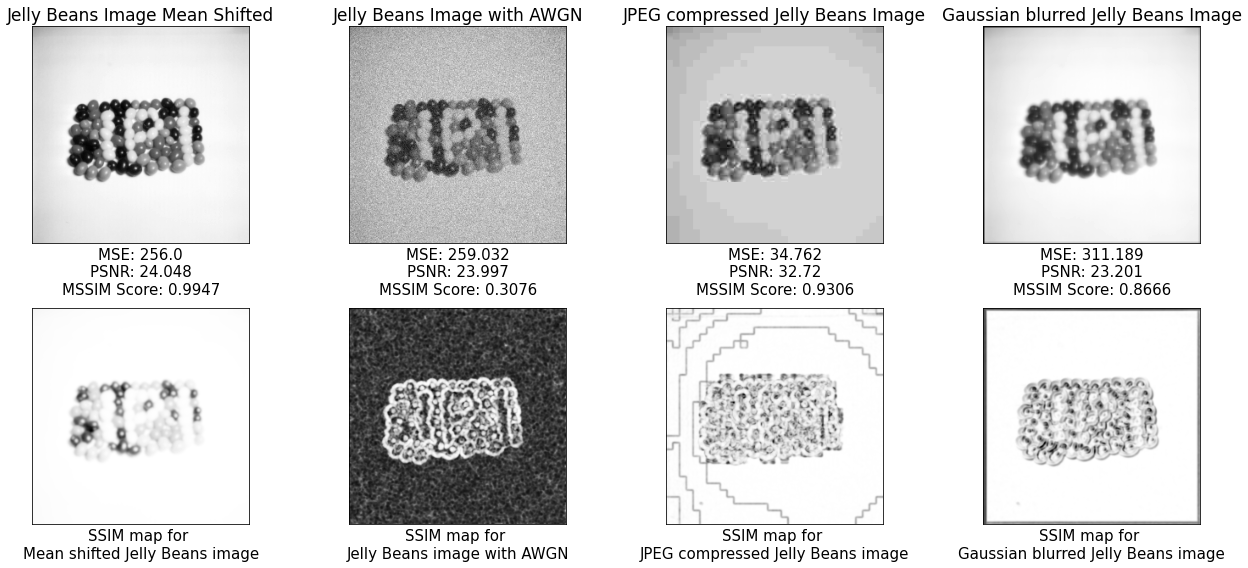

In [27]:
jelly_beans_psnr, jelly_beans_mssim = testOnImages(jelly_beans, 1, "Jelly Beans")

##### My rating for the above images will be (in order): 0.95, 0.4, 0.85, 0.7

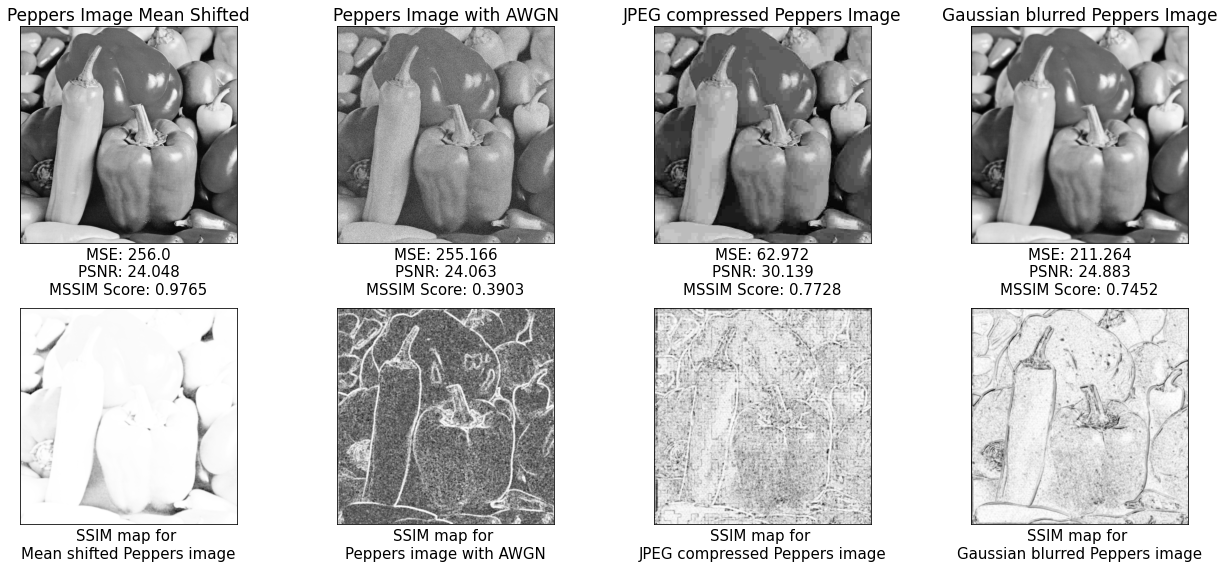

In [28]:
peppers_psnr,peppers_mssim = testOnImages(peppers, 1, "Peppers")

##### My rating for the above images will be (in order): 0.9, 0.6, 0.85, 0.85

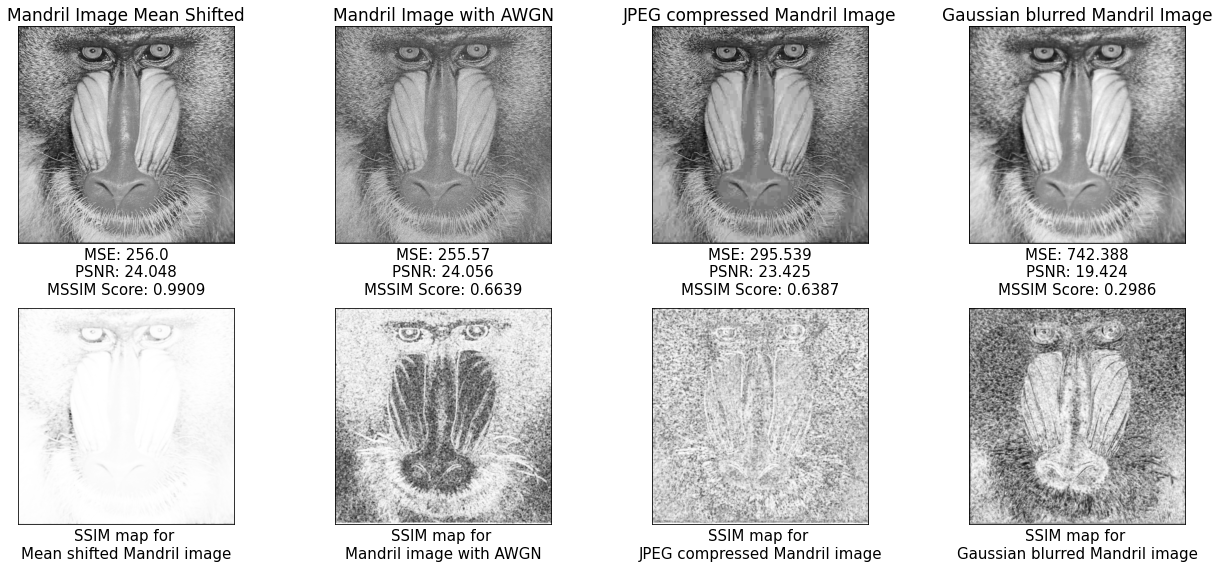

In [29]:
mandril_psnr, mandril_mssim = testOnImages(mandril, 1, "Mandril")

##### My rating for the above images will be (in order): 0.95, 0.8, 0.75, 0.4

<a name = '19'></a>
## Correlations of Scores

In [30]:
all_psnr = jelly_beans_psnr + peppers_psnr + mandril_psnr
all_mssim = jelly_beans_mssim + peppers_mssim + mandril_mssim
all_my_scores = np.array([0.95, 0.4, 0.85, 0.7, 0.9, 0.6, 0.85, 0.85, 0.95, 0.8, 0.75, 0.4])

corr_psnr = np.corrcoef(all_my_scores, all_psnr)[0][1]
corr_mssim = np.corrcoef(all_my_scores, all_mssim)[0][1]

In [31]:
print(f"Correlation between My Scores and PSNR: {corr_psnr}")
print(f"Correlation between My Scores and MSSIM: {corr_mssim}")

Correlation between My Scores and PSNR: 0.4495067642259055
Correlation between My Scores and MSSIM: 0.9212140200905434


From the correlation values it is safe to say that the MSSIM index is a better metric when compared to PSNR in modelling the scores given by humans.